In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import random 
from pprint import pprint

In [220]:
df = pd.read_csv("./data/Iris.csv")
df =df.drop("Id", axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Train Test Split

In [13]:
def train_test_split(df, test_size):
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))
        
    indices = df.index.tolist()
    test_indices = random.sample(population = indices, k=test_size)
    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices) 
    return train_df, test_df

In [61]:
train_df, test_df = train_test_split(df, test_size = 0.2)

# Helper Functions

In [26]:
data = train_df.values
data[:5]

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa']], dtype=object)

### Data pure?

In [30]:
def check_purity(data):
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)
    
    if len(unique_classes) == 1:
        return True
    else:
        return False

## Create leaf


In [333]:
def create_leaf(data, ml_task):
    label_column = data[:, -1]
    if ml_task == "regression":
        leaf = np.mean(label_column)
    elif ml_task == "classification":
        unique_classes, counts_unique_classes = np.unique(label_column, 
                                                          return_counts=True)
        index = counts_unique_classes.argmax()
        leaf = unique_classes[index]
    else:
        raise Exception("Unknow ML task :",ml_task)
    return leaf


In [355]:
create_leaf(data, ml_task="regression")

4267.467980295566

### Potential splits?

In [446]:
def get_potential_splits(data, random_subspace):
    potential_splits = {}
    _, n_columns = data.shape
    colums_indices = list(range(n_columns -1))
    if random_subspace and random_subspace <= len(colums_indices):
        colums_indices = random.sample(population=colums_indices, 
                                       k=random_subspace)
    
    for colums_index in colums_indices:
        values = data[:,colums_index]
        unique_values = np.unique(values)        
        potential_splits[colums_index] = unique_values
    return potential_splits

In [447]:
get_potential_splits(train_df.values,random_subspace=20)

{0: array([1, 2, 3], dtype=object),
 1: array(['female', 'male'], dtype=object),
 2: array([0.42, 0.83, 0.92, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
        10.0, 11.0, 12.0, 13.0, 14.0, 14.5, 15.0, 16.0, 17.0, 18.0, 19.0,
        20.0, 20.5, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 28.5,
        29.0, 30.0, 30.5, 31.0, 32.0, 32.5, 33.0, 34.0, 34.5, 35.0, 36.0,
        36.5, 37.0, 38.0, 39.0, 40.0, 40.5, 41.0, 42.0, 43.0, 44.0, 45.0,
        45.5, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0,
        55.5, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0,
        70.0, 70.5, 71.0, 80.0], dtype=object),
 3: array([0, 1, 2, 3, 4, 5, 8], dtype=object),
 4: array([0, 1, 2, 3, 4, 5, 6], dtype=object),
 5: array([0.0, 5.0, 6.2375, 6.4375, 6.45, 6.4958, 6.75, 6.8583, 6.95, 6.975,
        7.05, 7.0542, 7.125, 7.225, 7.2292, 7.25, 7.3125, 7.4958, 7.5208,
        7.55, 7.6292, 7.65, 7.7292, 7.7333, 7.7375, 7.7417, 7.75, 7.775,
        7.7958, 7.8, 7.8292, 7.8

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


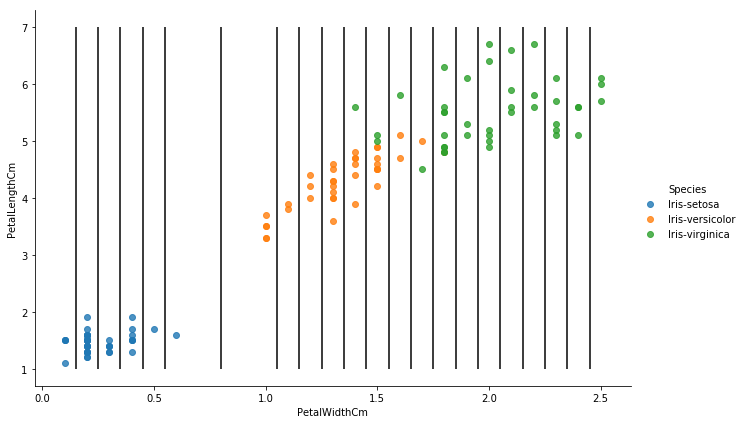

In [73]:
sns.lmplot(data = train_df, 
           x="PetalWidthCm", 
           y = "PetalLengthCm", 
           fit_reg = False,
           hue="Species",
           size = 6,
           aspect=1.5)
plt.vlines(x=potential_splits[3], ymin=1, ymax=7)

### Split data 

In [246]:
def split_data(data, split_column, split_value):
    split_column_values = data[:, split_column]
    type_of_feature = FEATURE_TYPES[split_column]
    
    if type_of_feature == "continuous":
        data_below = data[split_column_values <= split_value]
        data_above = data[split_column_values > split_value]
    else:
        data_below = data[split_column_values == split_value]
        data_above = data[split_column_values != split_value]
    return data_below, data_above

In [138]:
split_column = 3
split_value = 0.8

In [139]:
data_below, data_above = split_data(data,split_column, split_value)

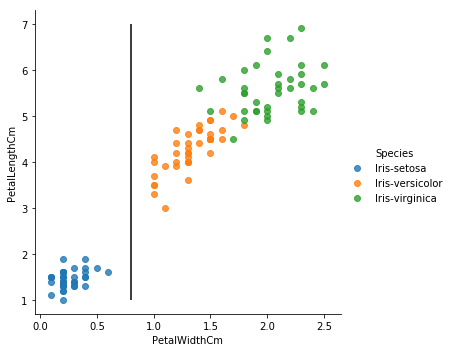

In [140]:
plotting_df=pd.DataFrame(data, columns=df.columns)
sns.lmplot(data = plotting_df, 
           x="PetalWidthCm", 
           y = "PetalLengthCm", 
           fit_reg = False,
           hue="Species")
plt.vlines(x=split_value, ymin=1, ymax=7)

### Determine best fit

In [369]:
def calculate_mse(data):
    actual_values = data[:,-1]
    if len(actual_values) == 0:
        mse=0
    else:
        prediction = np.mean(actual_values)
        mse = np.mean((actual_values - prediction)**2)
        
    return mse

In [370]:
def calculate_entropy(data):
    label_column = data[:,-1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
    
    return entropy

In [371]:
def calculate_overall_metric(data_below, data_above, metric_function):
    n_data_points = len(data_below) + len(data_above)
    p_data_below = len(data_below)/n_data_points
    p_data_above = len(data_above)/n_data_points

    overall_metric = (p_data_below * metric_function(data_below)) + (p_data_above * metric_function(data_above))
    
    return overall_metric

In [387]:
def determine_best_split(data, potential_split, ml_task):
    first_iteration = True

    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, 
                                                split_column= column_index,
                                                split_value=value)
            if ml_task == "regression":
                current_overall_metric = calculate_overall_metric(data_below, 
                                                            data_above,
                                                            metric_function=calculate_mse)
            elif ml_task == "classification":
                current_overall_metric = calculate_overall_metric(data_below, 
                                                            data_above,
                                                            metric_function=calculate_entropy)
            else:
                raise Exception("Unknow ML task:",ml_task)
                
            if first_iteration or current_overall_metric <= best_overall_metric:
                first_iteration = False
                
                best_overall_metric = current_overall_metric
                best_split_column = column_index
                best_split_value = value

    return best_split_column, best_split_value
    

### Determine type of the feature

In [235]:
def determine_type_fetaure(df):
    feature_types = []
    n_unique_values_threshold = 15
    for column in df.columns:
        unique_values = df[column].unique()
        example_value = unique_values[0]
        
        if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_threshold):
            feature_types.append("categorical")
        else:
            feature_types.append("continuous")
    return feature_types

### Decision Tree Algorithm

In [456]:
def decision_tree_algorithm(df, ml_task, type_of_data=0, min_samples=2, max_depth=5, random_subspace=None):  
    # Data preparation
    if type_of_data == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_fetaure(df)
        data = df.values
    else:
        data = df
    
    if (check_purity(data)) or len(data) < min_samples or (type_of_data == max_depth):
        leaf = create_leaf(data,ml_task)
        return leaf
    
    else:
        type_of_data +=1
        potential_splits = get_potential_splits(data,random_subspace)       
        split_column, split_value = determine_best_split(data, 
                                                        potential_splits,
                                                        ml_task)
        data_below, data_above = split_data(data, 
                                            split_column, 
                                            split_value)
        # check for empty data
        if len(data_below) == 0 or len(data_above) == 0:
            leaf = create_leaf(data,ml_task)
            return leaf
        
        #Subtree
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)
        else:
            question = "{} = {}".format(feature_name, split_value)
        sub_tree = {question: []}
        
        #Answer
        
        yes_answer = decision_tree_algorithm(data_below,
                                             ml_task,
                                             type_of_data,
                                             min_samples,
                                             max_depth,
                                             random_subspace)
        no_answer = decision_tree_algorithm(data_above, 
                                            ml_task,
                                            type_of_data,
                                            min_samples,
                                            max_depth,
                                            random_subspace)
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree
        

In [275]:
tree = decision_tree_algorithm(train_df, max_depth=2)
pprint(tree)

{'Sex = female': [1, {'Age <= 12.5': [1, 0]}]}


# Prediction

In [397]:
example = test_df.iloc[0]
example

date          2012-11-01
season                 4
yr                     1
mnth                  11
holiday                0
weekday                4
workingday             1
weathersit             2
temp            0.365833
atemp           0.369942
hum             0.581667
windspeed       0.157346
label               5986
Name: 670, dtype: object

In [401]:
def predict_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparision_operator, value = question.split()
    
    
    if comparision_operator == "<=":
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    if not isinstance(answer, dict):
        return answer
    else:
        residual_tree = answer
        return predict_example(example, residual_tree)
    

### Hyper paramter

In [398]:
def calculate_r_squared(df, tree):
    labels = df.label
    mean = labels.mean()
    predictions = df.apply(predict_example, args=(tree,), axis=1)
    
    ss_res = sum((labels - predictions)**2)
    ss_tot = sum((labels - mean)**2)
    r_squared = 1 - ss_res/ss_tot
    
    return r_squared  

In [402]:
grid_search = {"max_depth":[], 
               "min_samples":[],
               "r_squared_train":[],
               "r_squared_val":[]}
for max_depth in range(2,11):
    for min_samples in range(5,30,5):
        tree = decision_tree_algorithm(train_df, 
                                       ml_task="regression",
                                       max_depth=max_depth,
                                       min_samples=min_samples)
        r_squared_train = calculate_r_squared(train_df, tree)
        r_squared_val = calculate_r_squared(val_df, tree)
        grid_search["max_depth"].append(max_depth)
        grid_search["min_samples"].append(min_samples)
        grid_search["r_squared_train"].append(r_squared_train)
        grid_search["r_squared_val"].append(r_squared_val)
        
grid_search = pd.DataFrame(grid_search)
grid_search.sort_values("r_squared_val", ascending=False).head()

,max_depth,min_samples,r_squared_train,r_squared_val
22,6,15,0.903549,0.342614
15,5,5,0.892662,0.332979
17,5,15,0.884379,0.320092
16,5,10,0.891194,0.311048
10,4,5,0.861024,0.294405


### Visualization

In [403]:
best_max_depth = 6
best_min_samples = 15

tree = decision_tree_algorithm(train_df, 
                               ml_task="regression",
                               max_depth=best_max_depth,
                               min_samples=best_min_samples)
calculate_r_squared(test_df, tree)

0.12733153500783545

In [411]:
def create_plot(df, tree, title):
    predictions = df.apply(predict_example, args=(tree,), axis=1)
    actual = df.label
    plot_df = pd.DataFrame({"actual":actual, "predictions":predictions})
    plot_df.plot(figsize=(18,5), title=title)
    return

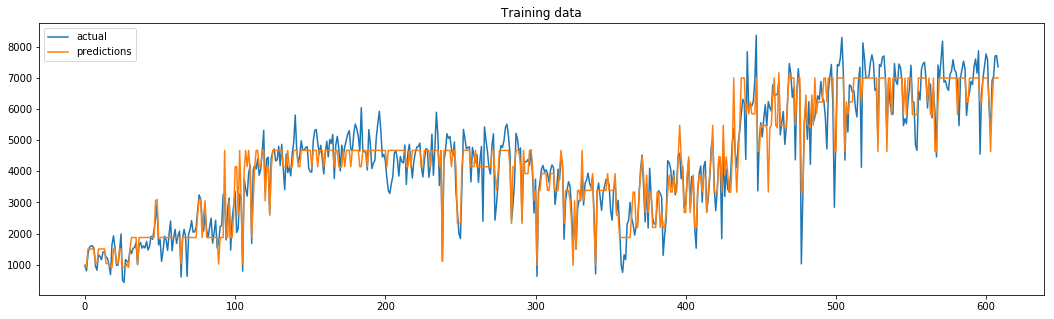

In [412]:
create_plot(train_df, tree, title="Training data")

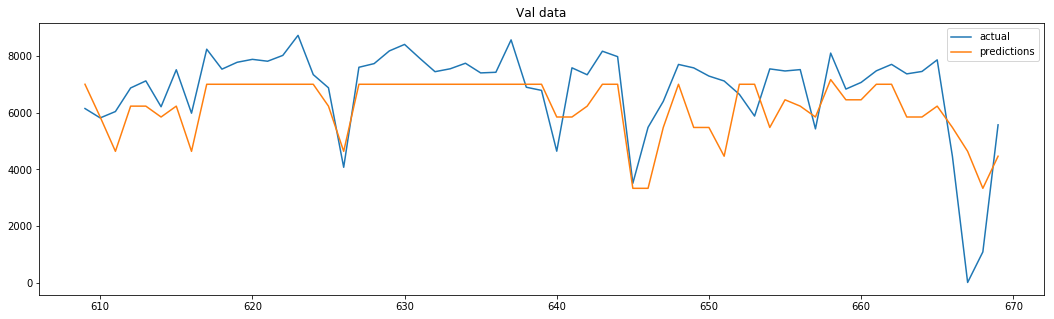

In [413]:
create_plot(val_df, tree, title="Val data")

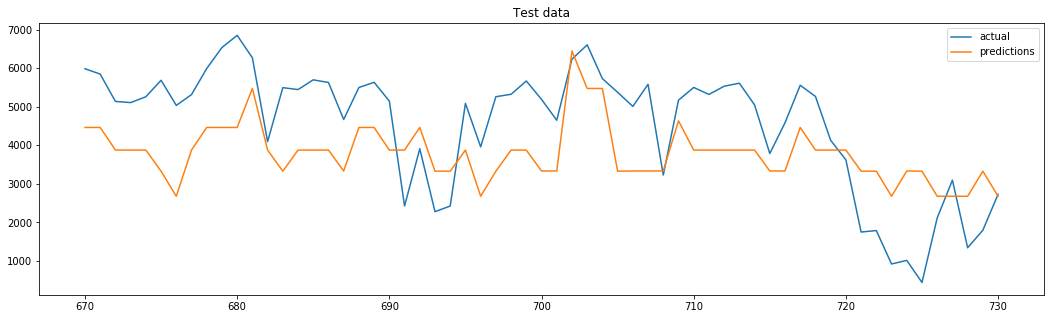

In [414]:
create_plot(test_df, tree, title="Test data")

# Accuracy

In [282]:
def calculate_accuracy(df, tree):
    df["classification"] = df.apply(classify_example, 
                                    axis=1, 
                                    args=(tree, ))
    df["classification_correct"] = df["classification"] == df["label"]
    accuracy = df.classification_correct.mean()
    return accuracy

In [216]:
calculate_accuracy(test_df, tree)

1.0

# Titanic dataset

In [415]:
df = pd.read_csv("./data/Titanic.csv")
df["label"] = df.Survived
df= df.drop(["Survived", "Name", "Ticket", "Cabin","PassengerId"], axis =1)

In [416]:
# Adding missing values 

median_age = df.Age.median()
mode_Embarked = df.Embarked.mode()[0]
df = df.fillna({"Age": median_age, "Embarked": mode_Embarked})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
label       891 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Decision Tree

In [505]:
train_df, test_df = train_test_split(df, test_size=0.2)
tree = decision_tree_algorithm(train_df, 
                               ml_task="classification",
                               max_depth=3)
accuracy = calculate_accuracy(test_df, tree)

pprint(tree, width = 50)
pprint(accuracy)

In [450]:
df = pd.read_csv("./data/bike_sharing_daily.csv")
df = df.drop(["instant", "casual", "registered"], axis=1)
df = df.rename({"dteday": "date"}, axis=1)
df.head()

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [451]:
df["label"] = df.cnt
df = df.drop("cnt", axis=1)

In [452]:
train_df = df.iloc[:-122]
val_df = df.iloc[-122:-61]  # Sep and Oct of 2012
test_df = df.iloc[-61:]     # Nov and Dec of 2012

In [395]:
data = train_df.values
tree = decision_tree_algorithm(train_df, ml_task="regression", max_depth=3)

In [396]:
tree

{'temp <= 0.43083299999999997': [{'yr = 1': [{'atemp <= 0.292908': [2811.90625,
      4139.282608695652]},
    {'season = 4': [3364.734693877551, 1711.138888888889]}]},
  {'yr = 1': [{'hum <= 0.772083': [6631.973154362416, 5131.35294117647]},
    {'weathersit = 3': [2320.5, 4374.32]}]}]}

### Random Forest

In [427]:
def bootstrapping(train_df, n_bootstraps):
    bootstrap_indices = np.random.randint(low =0, 
                                          high=len(train_df), 
                                          size=n_bootstraps)
    df_bootstrapped = train_df.iloc[bootstrap_indices]
    
    return df_bootstrapped

In [448]:
bootstrapping(train_df,n_bootstraps=1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,label
137,1,male,37.0,1,0,53.1,S,0


In [449]:
def random_forest_algorithm(train_df, ml_task, n_trees, n_bootstrap, n_features, dt_max_depth):
    forest = []
    for i in range(n_trees):
        df_bootstrapped = bootstrapping(train_df,n_bootstrap)
        tree = decision_tree_algorithm(df_bootstrapped, 
                                       ml_task=ml_task,
                                       max_depth=dt_max_depth,
                                       random_subspace=n_features)
        
        forest.append(tree) 
    return forest

In [458]:
forest = random_forest_algorithm(train_df,
                                    ml_task="regression",
                                    n_trees=4,
                                    n_bootstrap=400,
                                    n_features=4,
                                    dt_max_depth=4)

In [495]:
r_squared_values = []
for i in range(10):
    forest = random_forest_algorithm(train_df,
                                    ml_task="regression",
                                    n_trees=4,
                                    n_bootstrap=400,
                                    n_features=4,
                                    dt_max_depth=4)
    predictions = random_forest_prediction(test_df, forest)
    r_squared_value = r_squared(test_df,predictions)
    print(r_squared_value)
    r_squared_values.append(r_squared_value)

print("Average rsquare :{}".format(np.array(r_squared_values).mean()))
    

0.17869175381870073
0.08975820498367992
0.08996467162560429
0.2971402463327776
0.17000393197236507
0.21313340950316229
0.17405447363511306
0.1071093084894148
-0.10623737336068806
0.02063606734885204
Average rsquare :0.12342546943489818


In [470]:
def random_forest_prediction(test_df, forest):
    df_prediction={}
    for i in range(len(forest)):
        column_name = "tree_{}".format(i)
        predictions = test_df.apply(predict_example, 
                                    args=(forest[i],), 
                                    axis=1)
        df_prediction[column_name]=predictions

    df_prediction = pd.DataFrame(df_prediction)   
    random_forest_predictions = df_prediction.mean(axis=1)
    
    return random_forest_predictions

In [504]:
def r_squared(df, predictions):
    labels = df.label
    mean = labels.mean()    
    ss_res = sum((labels - predictions)**2)
    ss_tot = sum((labels - mean)**2)
    r_squared = 1 - ss_res/ss_tot
    
    return r_squared

In [488]:
forest = random_forest_algorithm(train_df,
                                    ml_task="regression",
                                    n_trees=1,
                                    n_bootstrap=500,
                                    n_features=40,
                                    dt_max_depth=4)
calculate_r_squared(test_df, forest[0])

0.23760747877126753